<a href="https://colab.research.google.com/github/Faiz-Hibatullah/machine-learning-1103210172/blob/main/8.%20Week%208%20UTS/Regression_Model_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download file dari Google Drive
!gdown --id 1oEXSD137hPm_Fx5xSPRvlAr3silj3suK

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
From (redirected): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK&confirm=t&uuid=97ecce13-5a36-421e-bd1b-44a8b38b615e
To: /content/RegresiUTSTelkom.csv
100% 443M/443M [00:07<00:00, 56.9MB/s]


In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression, VarianceThreshold, mutual_info_regression, chi2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.base import BaseEstimator, TransformerMixin

# Untuk menampilkan plot dalam notebook
%matplotlib inline
plt.style.use('ggplot')

# Pengaturan output untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

# 1. Pengumpulan dan Pembersihan Data

Memuat dan memeriksa dataset...

Melihat 5 baris pertama data:
   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  -2.46783  3.32136  -2.31521  10.20556  \
0    8.76630   -0.92019  18.76548   4.59210  2.21920   0.34006  44.38997   
1   -3.27872   -2.35035  16.07017   1.39518  2.73553   0.82804   7.46586   
2    5.05097  -10.34124   3.55005  -6.36304  6.63016  -3.35142  37.64085   
3  -12.48207   -9.37636  12.63699   0.93609  1.60923   2.19223  47.32082   
4   20.67345   -5.19943   3.63566  -4.69088  2.49578  -3.02468   7.69273   

    611.10913    951.0896  698.11428  408

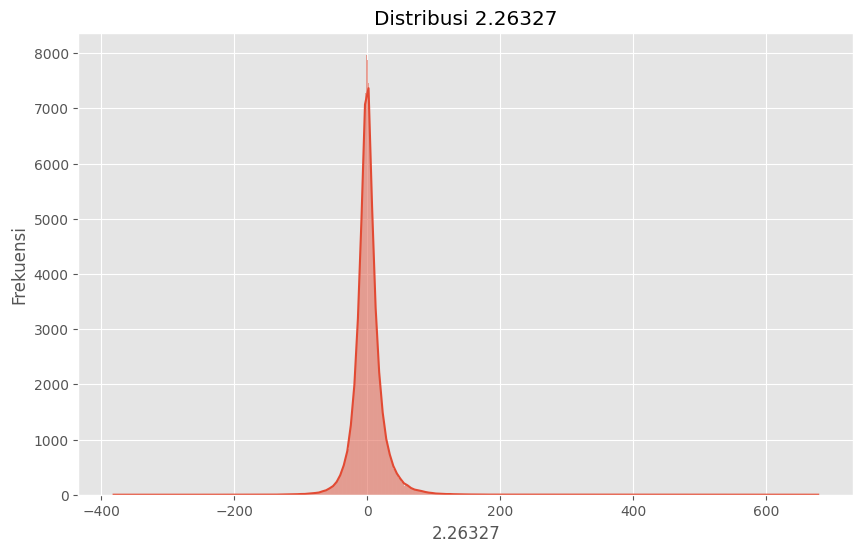

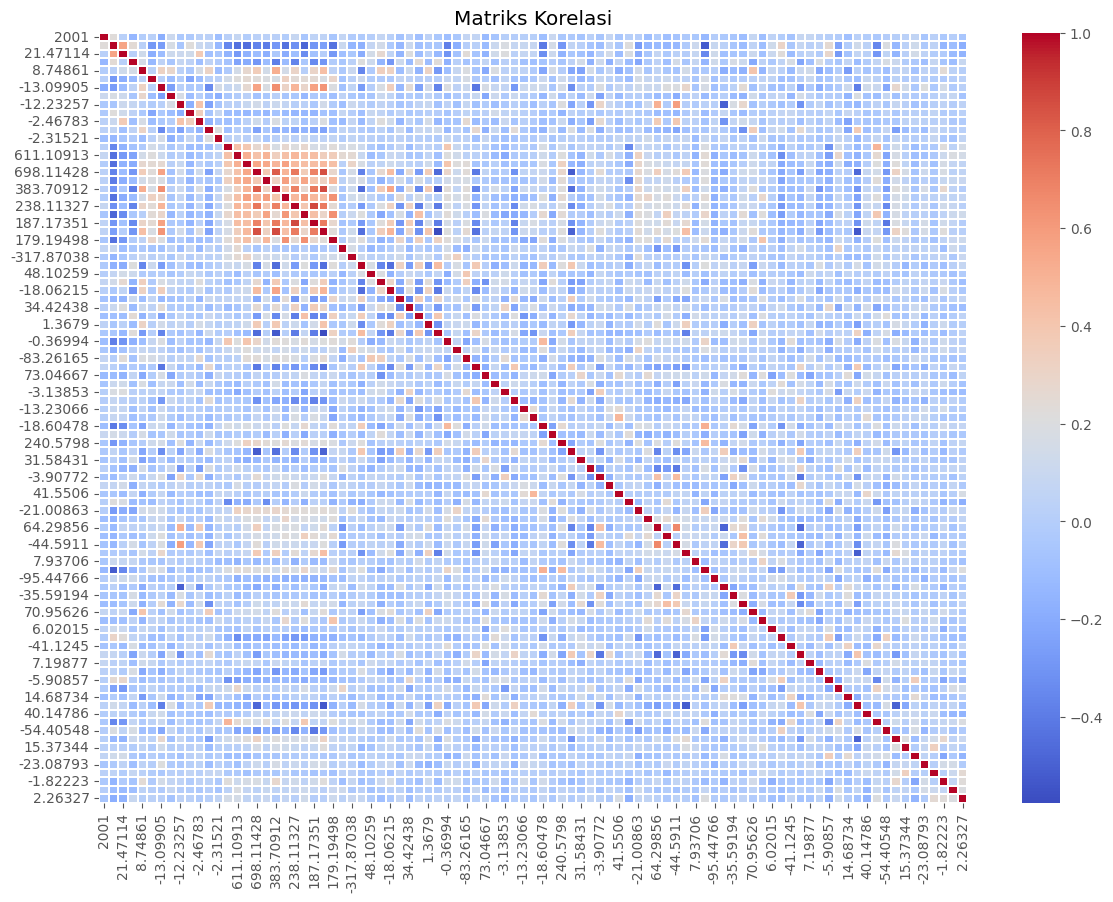

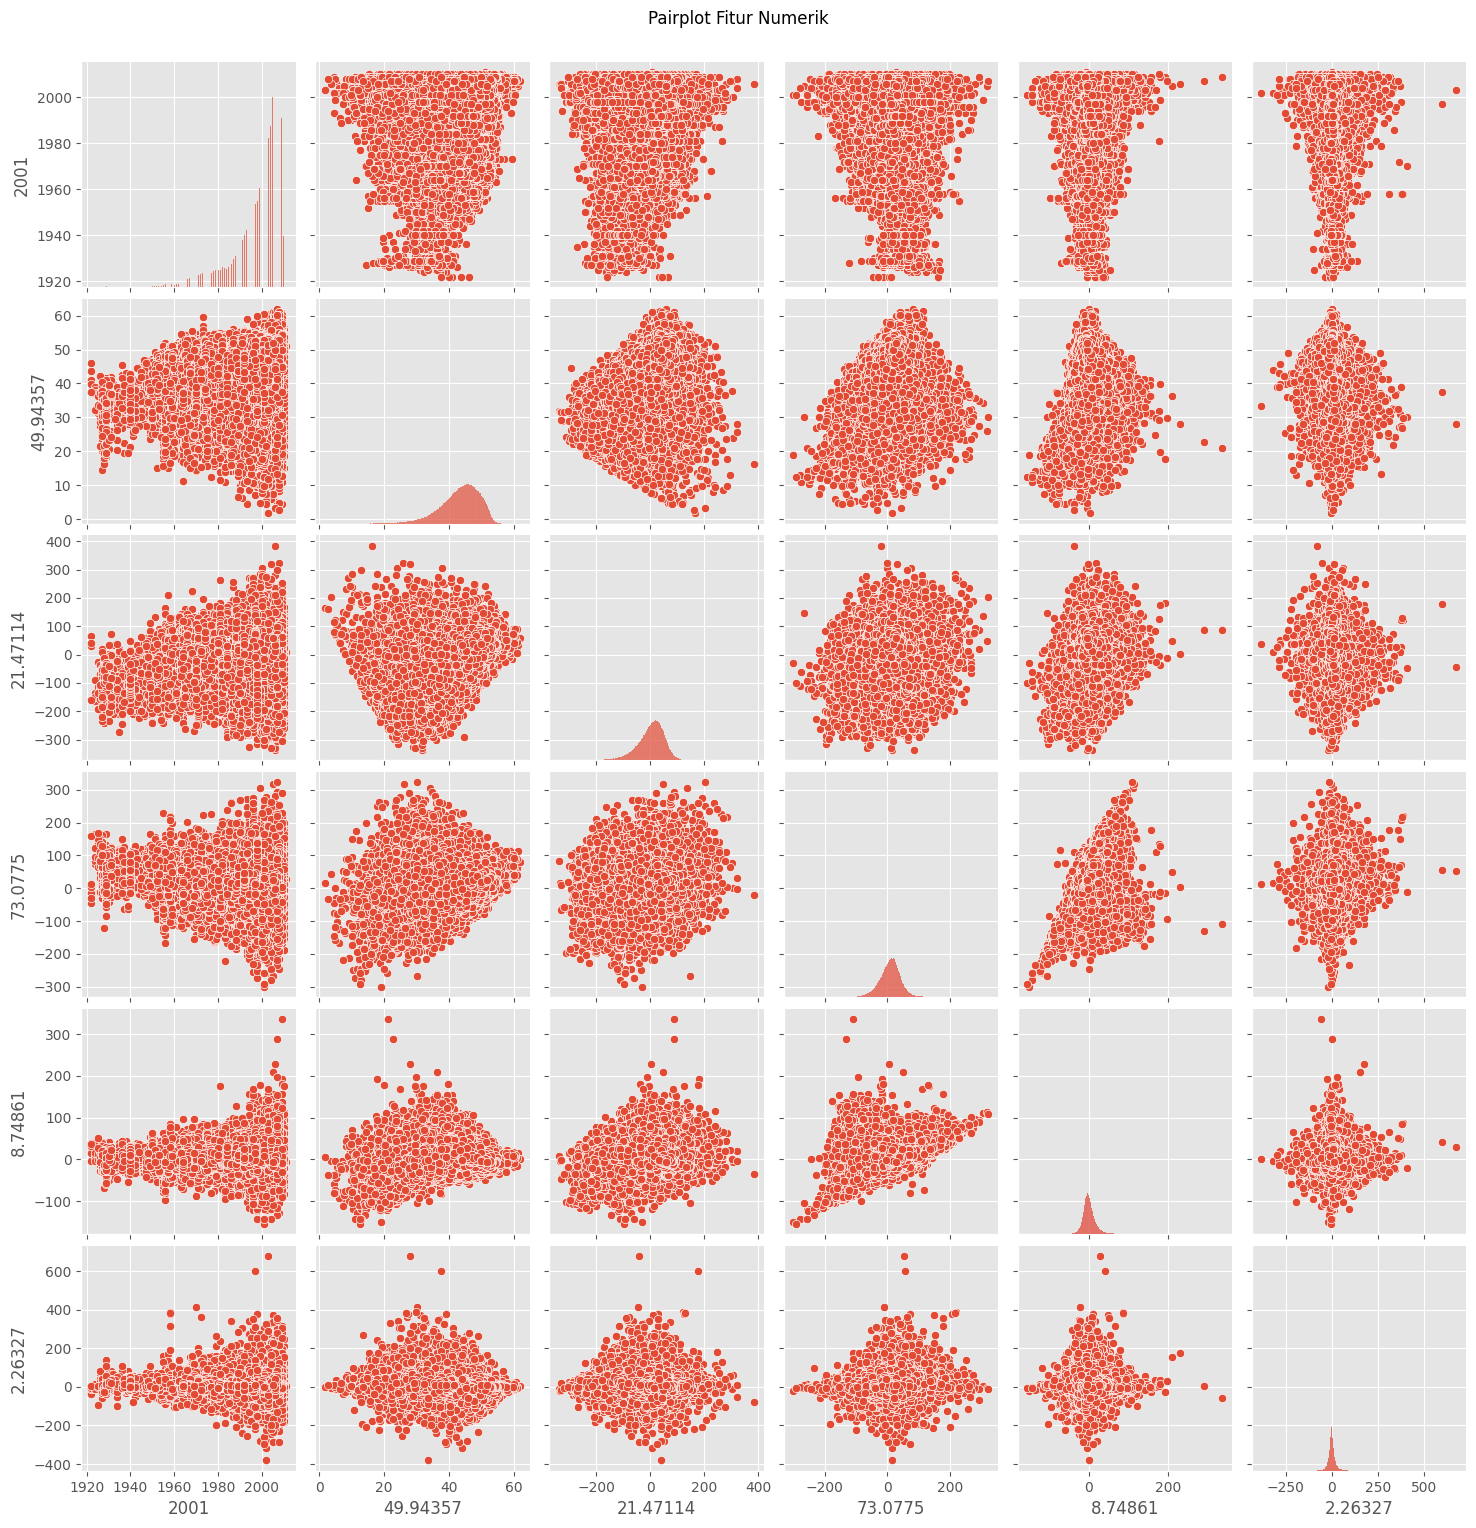


Memeriksa duplikasi data...
Ditemukan 214 baris duplikat. Menghapus duplikasi...

Jumlah fitur: 90
Jumlah sampel: 515130


In [ ]:
# Membaca data dari CSV
print("Memuat dan memeriksa dataset...")
data = pd.read_csv('RegresiUTSTelkom.csv')  # Ubah nama file di sini

# Eksplorasi awal data
print("\nMelihat 5 baris pertama data:")
print(data.head())

print("\nInformasi dataset:")
print(data.info())

print("\nStatistik deskriptif:")
print(data.describe())

print("\nJumlah nilai yang hilang pada setiap kolom:")
print(data.isnull().sum())

# Visualisasi distribusi target variable (harga rumah)
# Periksa terlebih dahulu apakah ada kolom 'price' atau nama lain yang mungkin menjadi target
print("\nKolom-kolom dalam dataset:")
print(data.columns.tolist())

# Asumsikan kolom target adalah kolom numerik dengan nilai yang bervariasi
# Mari kita cari kolom yang mungkin menjadi target variabel
potential_target_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("\nKolom numerik potensial sebagai target variabel:")
print(potential_target_columns.tolist())

# Untuk tujuan demonstrasi, kita akan menggunakan kolom numerik terakhir sebagai target
# Dalam kasus nyata, Anda perlu mengetahui kolom mana yang merupakan target
target_column = potential_target_columns[-1]
print(f"\nMenggunakan '{target_column}' sebagai variabel target")

# Visualisasi distribusi target variable
plt.figure(figsize=(10, 6))
sns.histplot(data[target_column], kde=True)
plt.title(f'Distribusi {target_column}')
plt.xlabel(target_column)
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi korelasi antar variabel
plt.figure(figsize=(14, 10))
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.3)
plt.title('Matriks Korelasi')
plt.show()

# Visualisasi pairplot untuk melihat hubungan antar variabel numerik (menggunakan 5 fitur saja agar tidak terlalu padat)
numeric_features = numerical_data.columns[:5].tolist()
numeric_features.append(target_column)
sns.pairplot(data[numeric_features])
plt.suptitle('Pairplot Fitur Numerik', y=1.02)
plt.show()

# Penanganan nilai yang hilang jika ada
if data.isnull().sum().sum() > 0:
    print("\nMenangani nilai yang hilang...")
    # Imputasi sederhana dengan mean/median/most frequent
    numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = data.select_dtypes(include=['object']).columns.tolist()

    # Imputasi numerik dengan median
    for col in numeric_features:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].median(), inplace=True)

    # Imputasi kategorikal dengan modus
    for col in categorical_features:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].mode()[0], inplace=True)

# Pembersihan data lainnya
print("\nMemeriksa duplikasi data...")
duplicate_count = data.duplicated().sum()
if duplicate_count > 0:
    print(f"Ditemukan {duplicate_count} baris duplikat. Menghapus duplikasi...")
    data = data.drop_duplicates()
else:
    print("Tidak ditemukan data duplikat.")

# Memisahkan fitur dan target
X = data.drop(target_column, axis=1)
y = data[target_column]

print(f"\nJumlah fitur: {X.shape[1]}")
print(f"Jumlah sampel: {X.shape[0]}")

# 2. Feature Selection

In [ ]:
# Membuat kelas untuk feature selection
class FeatureSelector(BaseEstimator, TransformerMixin):
    """
    Kelas untuk melakukan berbagai teknik feature selection
    """
    def __init__(self, variance_threshold=0.01, correlation_threshold=0.8, k_best=10):
        self.variance_threshold = variance_threshold
        self.correlation_threshold = correlation_threshold
        self.k_best = k_best
        self.selected_features = None
        self.feature_names = None

    def fit(self, X, y=None):
        # Simpan nama fitur
        if isinstance(X, pd.DataFrame):
            self.feature_names = X.columns.tolist()
            X_np = X.to_numpy()
        else:
            X_np = X
            self.feature_names = [f"feature_{i}" for i in range(X.shape[1])]

        # 1. Constant / quasi-constant feature removal
        print("\nMenerapkan Constant/Quasi-constant feature removal...")
        selector = VarianceThreshold(threshold=self.variance_threshold)
        X_var_selected = selector.fit_transform(X_np)
        var_support = selector.get_support()

        # Setelah constant feature removal
        constant_features = [f for f, supported in zip(self.feature_names, var_support) if not supported]
        if constant_features:
            print(f"Fitur konstan yang dihapus: {constant_features}")
        else:
            print("Tidak ada fitur konstan yang dihapus.")

        var_selected_features = [f for f, supported in zip(self.feature_names, var_support) if supported]

        # Jika semua fitur dihapus, kembalikan semua
        if len(var_selected_features) == 0:
            var_selected_features = self.feature_names.copy()

        # 2. Analisis korelasi
        if isinstance(X, pd.DataFrame):
            print("\nMenerapkan analisis korelasi...")
            X_selected = X[var_selected_features]
            correlation = X_selected.corr().abs()

            # Upper triangle of correlation matrix
            upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))

            # Temukan fitur dengan korelasi di atas threshold
            to_drop = [column for column in upper.columns if any(upper[column] > self.correlation_threshold)]

            if to_drop:
                print(f"Fitur dengan korelasi tinggi yang dihapus: {to_drop}")
                corr_selected_features = [f for f in var_selected_features if f not in to_drop]
            else:
                print("Tidak ada fitur dengan korelasi tinggi.")
                corr_selected_features = var_selected_features.copy()

            # Jika semua fitur dihapus, kembalikan semua
            if len(corr_selected_features) == 0:
                corr_selected_features = var_selected_features.copy()
        else:
            corr_selected_features = var_selected_features.copy()

        # 3. Mutual information untuk fitur numerik
        print("\nMenerapkan Mutual Information Feature Selection...")
        numeric_features = [f for f in corr_selected_features if
                            isinstance(X, pd.DataFrame) and np.issubdtype(X[f].dtype, np.number)]

        if numeric_features:
            if isinstance(X, pd.DataFrame):
                X_numeric = X[numeric_features].copy()
                # Imputasi nilai yang hilang jika ada
                for col in X_numeric.columns:
                    if X_numeric[col].isnull().sum() > 0:
                        X_numeric[col].fillna(X_numeric[col].median(), inplace=True)

                mi_scores = mutual_info_regression(X_numeric, y)
                mi_scores = pd.Series(mi_scores, index=numeric_features)
                mi_scores = mi_scores.sort_values(ascending=False)

                print("\nSkor Mutual Information untuk fitur numerik:")
                for i, v in mi_scores.items():
                    print(f"- {i}: {v:.4f}")

        # Gabungkan semua fitur terpilih
        self.selected_features = corr_selected_features

        # 4. SelectKBest untuk pemilihan fitur final
        if len(self.selected_features) > self.k_best and isinstance(X, pd.DataFrame):
            try:
                print(f"\nMenerapkan SelectKBest (k={self.k_best})...")
                X_selected = X[self.selected_features].copy()

                # Imputasi nilai yang hilang untuk perhitungan f_regression
                for col in X_selected.columns:
                    if X_selected[col].isnull().sum() > 0:
                        if np.issubdtype(X_selected[col].dtype, np.number):
                            X_selected[col].fillna(X_selected[col].median(), inplace=True)
                        else:
                            X_selected[col].fillna(X_selected[col].mode()[0], inplace=True)

                # Konversi ke numerik jika memungkinkan
                for col in X_selected.columns:
                    if not np.issubdtype(X_selected[col].dtype, np.number):
                        try:
                            X_selected[col] = pd.to_numeric(X_selected[col])
                        except:
                            continue

                # Filter kolom numerik saja
                numeric_cols = X_selected.select_dtypes(include=[np.number]).columns.tolist()
                if numeric_cols:
                    X_numeric = X_selected[numeric_cols]
                    selector = SelectKBest(f_regression, k=min(self.k_best, len(numeric_cols)))
                    selector.fit(X_numeric, y)

                    k_best_support = selector.get_support()
                    k_best_features = [f for f, supported in zip(numeric_cols, k_best_support) if supported]

                    # Dapatkan skor f_regression untuk fitur
                    scores = selector.scores_
                    scores_df = pd.DataFrame({'Feature': numeric_cols, 'Score': scores})
                    scores_df = scores_df.sort_values(by='Score', ascending=False)

                    print("\nSkor f_regression untuk fitur numerik:")
                    print(scores_df)

                    # Gabungkan fitur kategorikal yang tersisa dengan fitur k_best
                    categorical_cols = [f for f in self.selected_features if f not in numeric_cols]
                    self.selected_features = k_best_features + categorical_cols
            except Exception as e:
                print(f"Error pada SelectKBest: {str(e)}")
                # Jika gagal, tetap gunakan fitur yang sudah terpilih sebelumnya
                pass

        print(f"\nJumlah fitur yang dipilih: {len(self.selected_features)}")
        print(f"Fitur terpilih: {self.selected_features}")

        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            return X[self.selected_features]
        else:
            # Jika X bukan DataFrame, gunakan indeks fitur yang terpilih
            feature_indices = [i for i, f in enumerate(self.feature_names) if f in self.selected_features]
            return X[:, feature_indices]

# 3. Feature Engineering

In [ ]:
if len(X) > 5000:
    print("Using a subset of data for easier processing...")
    X_sample = X.sample(5000, random_state=42)
    y_sample = y[X_sample.index]
else:
    X_sample = X
    y_sample = y

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

print("\nMelakukan Feature Engineering...")

# Identifikasi tipe kolom
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Fitur numerik: {numeric_features}")
print(f"Fitur kategorikal: {categorical_features}")

# Simplify the FeatureSelector class
class SimpleFeatureSelector(BaseEstimator, TransformerMixin):
    """
    Simplified feature selector using variance threshold and correlation
    """
    def __init__(self, variance_threshold=0.01, correlation_threshold=0.8):
        self.variance_threshold = variance_threshold
        self.correlation_threshold = correlation_threshold
        self.selected_features = None

    def fit(self, X, y=None):
        # Handle non-DataFrame inputs
        if not isinstance(X, pd.DataFrame):
            # Convert to DataFrame if possible
            try:
                feature_names = [f"feature_{i}" for i in range(X.shape[1])]
                X = pd.DataFrame(X, columns=feature_names)
            except:
                # If conversion fails, return identity transform
                self.selected_features = list(range(X.shape[1]))
                return self

        # Apply variance threshold on numeric features only
        numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
        if numeric_cols:
            try:
                selector = VarianceThreshold(threshold=self.variance_threshold)
                selector.fit(X[numeric_cols])
                var_support = selector.get_support()
                var_features = [col for i, col in enumerate(numeric_cols) if var_support[i]]
            except:
                var_features = numeric_cols
        else:
            var_features = []

        # Get categorical features
        cat_features = [col for col in X.columns if col not in numeric_cols]

        # Combine features
        all_features = var_features + cat_features

        # Apply correlation filter if enough numeric features remain
        if len(var_features) > 1:
            try:
                # Calculate correlation only on numeric features
                X_var = X[var_features]
                corr_matrix = X_var.corr().abs()
                upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                to_drop = [column for column in upper.columns if any(upper[column] > self.correlation_threshold)]
                self.selected_features = [f for f in all_features if f not in to_drop or f in cat_features]
            except:
                self.selected_features = all_features
        else:
            self.selected_features = all_features

        # Make sure we have at least one feature
        if not self.selected_features:
            self.selected_features = X.columns.tolist()

        print(f"Selected {len(self.selected_features)} features")
        return self

    def transform(self, X):
        # Handle non-DataFrame inputs
        if not isinstance(X, pd.DataFrame):
            try:
                feature_names = [f"feature_{i}" for i in range(X.shape[1])]
                X = pd.DataFrame(X, columns=feature_names)
            except:
                # If we can't convert to DataFrame, return original X
                return X

        # Return selected features
        try:
            return X[self.selected_features]
        except:
            # If selection fails, return original X
            return X

# Define transformations for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformations in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Using a subset of data for easier processing...

Melakukan Feature Engineering...
Fitur numerik: ['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628', '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136', '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428', '408.98485', '383.70912', '326.51512', '238.11327', '251.42414', '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038', '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438', '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165', '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531', '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798', '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506', '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481', '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307', '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767', '-41.1245', '-8.40816

# 4. Modeling


Membuat dan mengevaluasi model...

Melatih model: Linear Regression...

Menerapkan Constant/Quasi-constant feature removal...
Tidak ada fitur konstan yang dihapus.

Menerapkan Mutual Information Feature Selection...

Jumlah fitur yang dipilih: 90
Fitur terpilih: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'fe

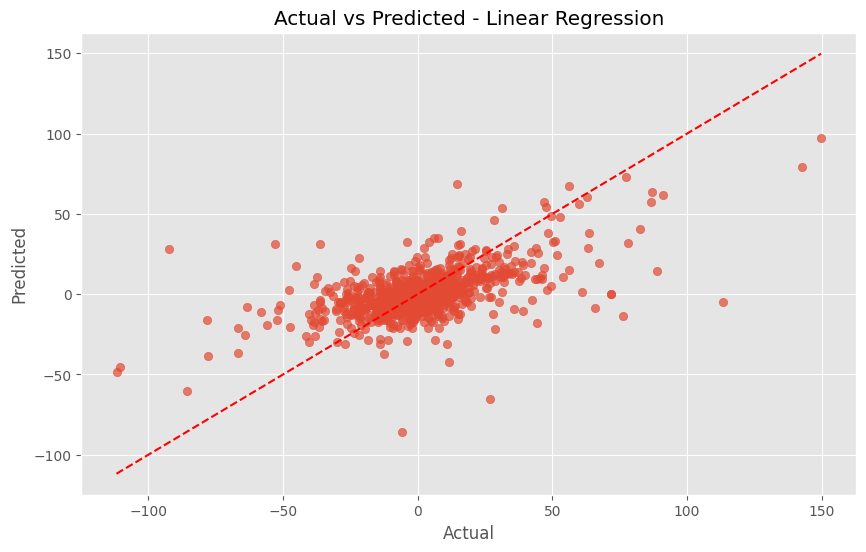

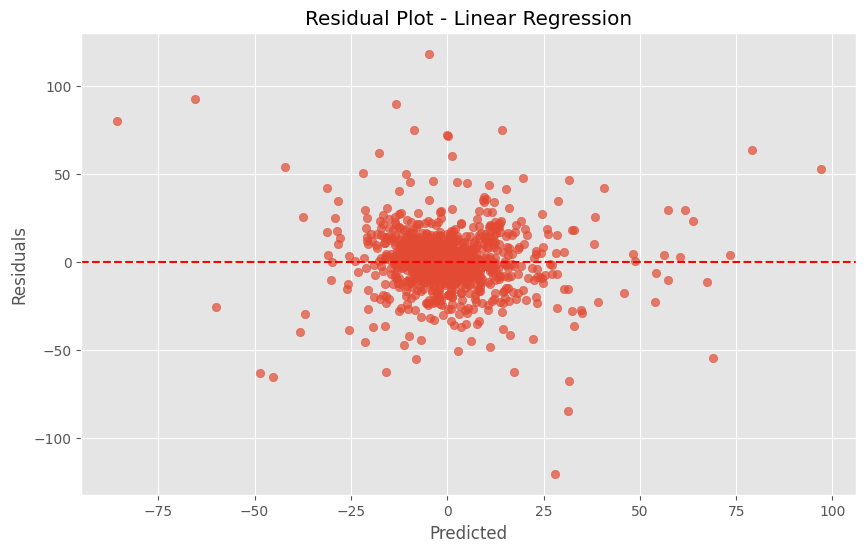


Melatih model: Polynomial Regression...

Menerapkan Constant/Quasi-constant feature removal...
Tidak ada fitur konstan yang dihapus.

Menerapkan Mutual Information Feature Selection...

Jumlah fitur yang dipilih: 90
Fitur terpilih: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'featu

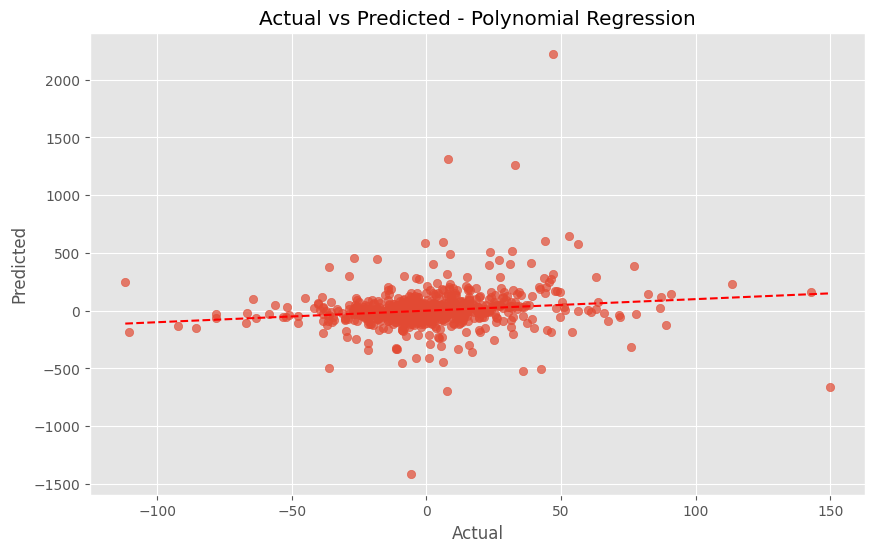

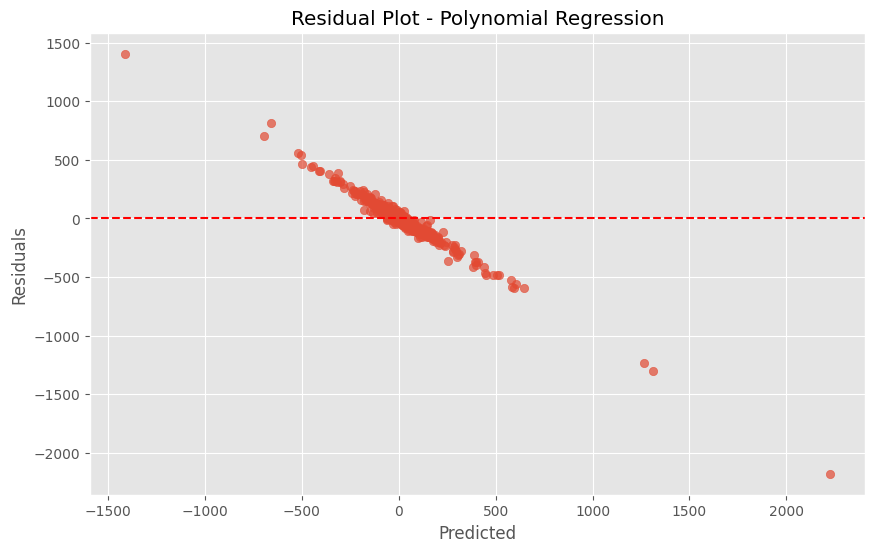


Melatih model: Decision Tree...

Menerapkan Constant/Quasi-constant feature removal...
Tidak ada fitur konstan yang dihapus.

Menerapkan Mutual Information Feature Selection...

Jumlah fitur yang dipilih: 90
Fitur terpilih: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 

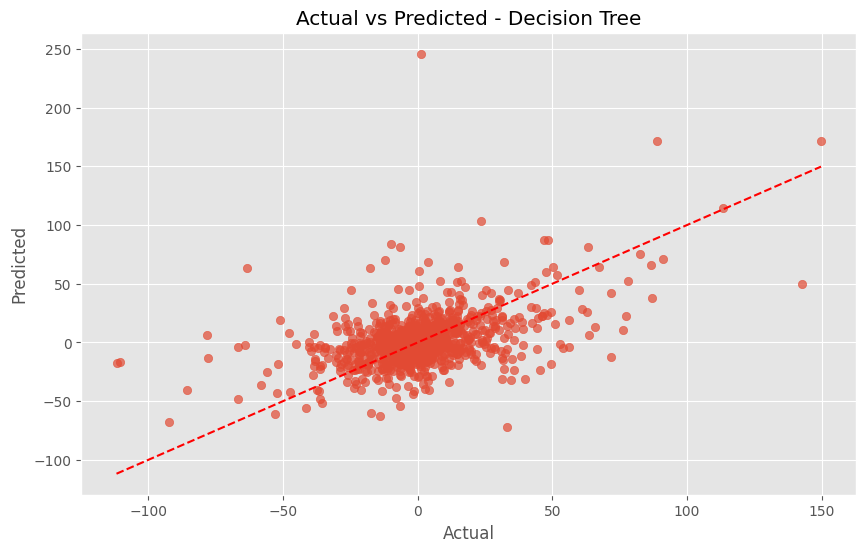

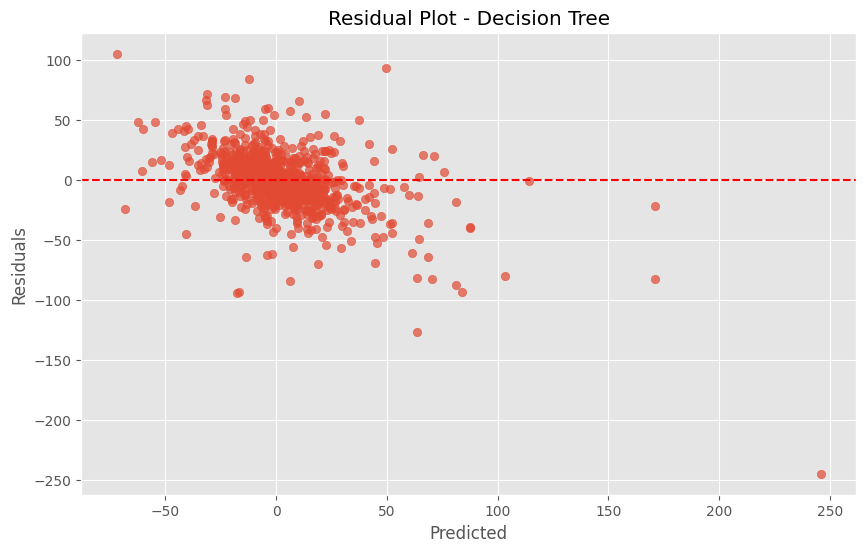


Melatih model: K-Neighbors...

Menerapkan Constant/Quasi-constant feature removal...
Tidak ada fitur konstan yang dihapus.

Menerapkan Mutual Information Feature Selection...

Jumlah fitur yang dipilih: 90
Fitur terpilih: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'f

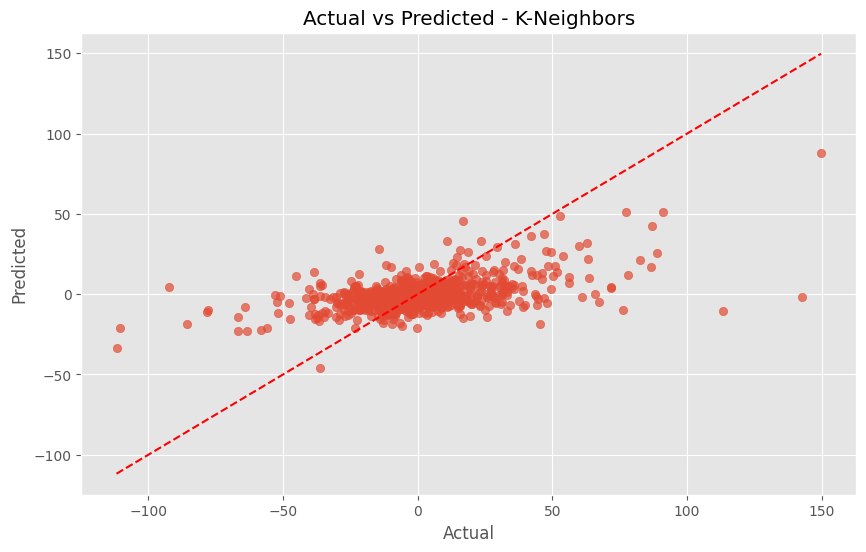

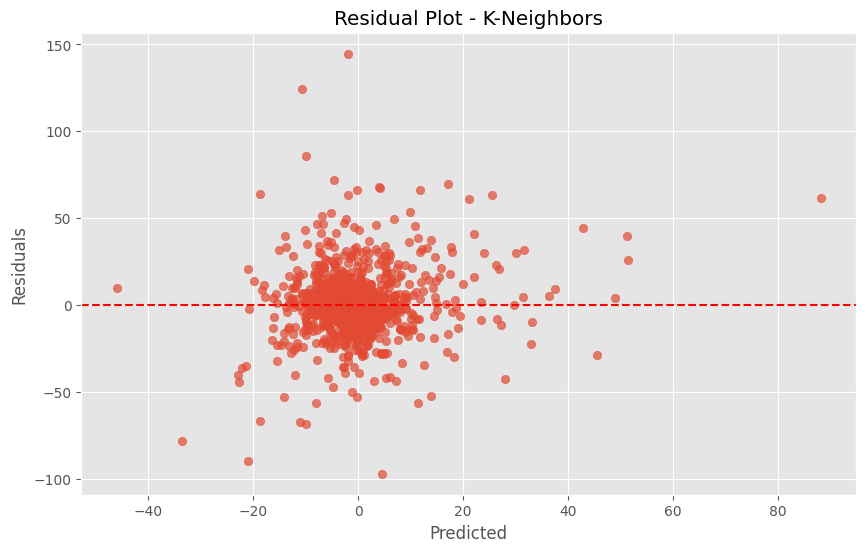


Melatih model: Bagging Regressor...

Menerapkan Constant/Quasi-constant feature removal...
Tidak ada fitur konstan yang dihapus.

Menerapkan Mutual Information Feature Selection...

Jumlah fitur yang dipilih: 90
Fitur terpilih: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_5

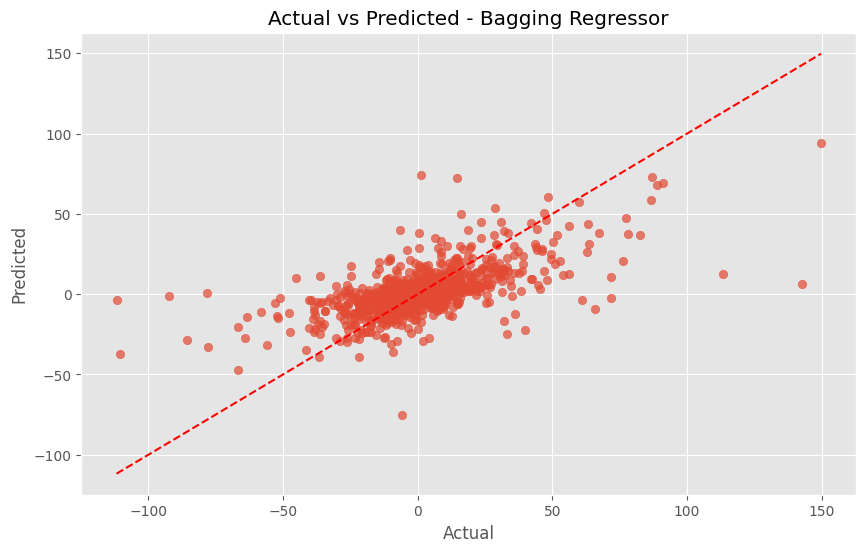

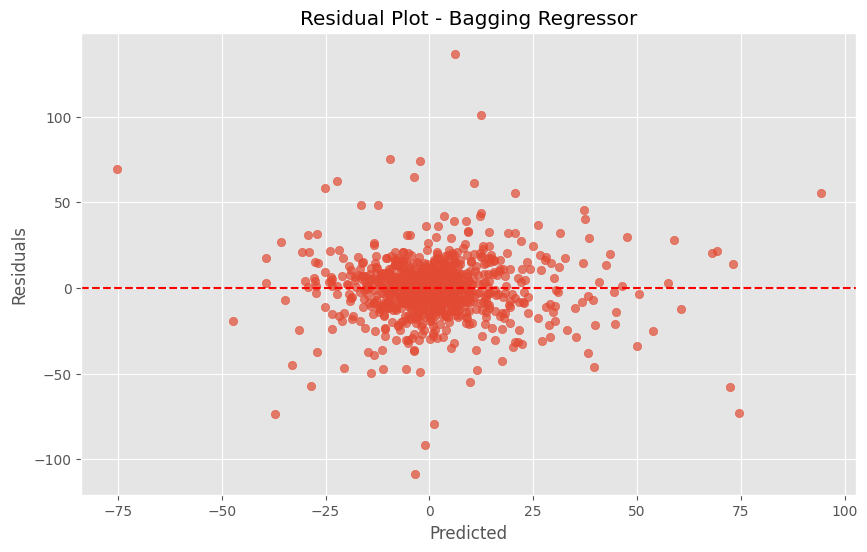


Melatih model: AdaBoost Regressor...

Menerapkan Constant/Quasi-constant feature removal...
Tidak ada fitur konstan yang dihapus.

Menerapkan Mutual Information Feature Selection...

Jumlah fitur yang dipilih: 90
Fitur terpilih: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_

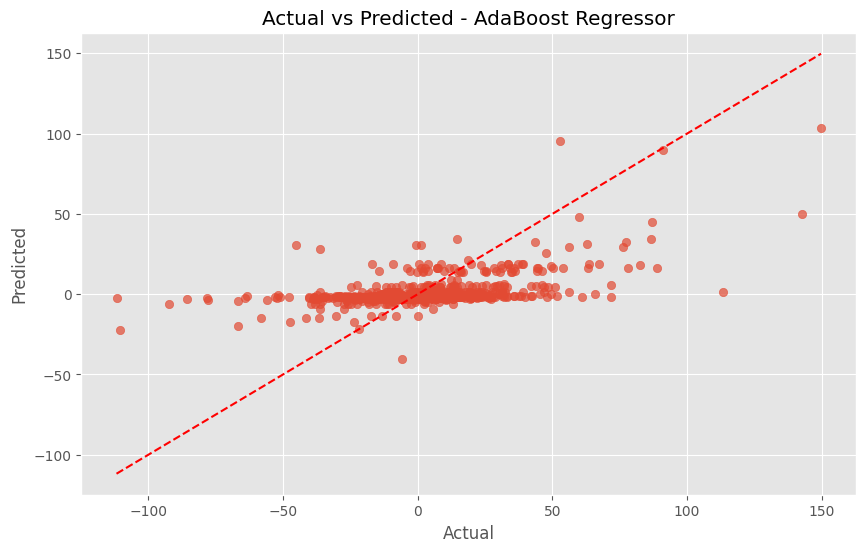

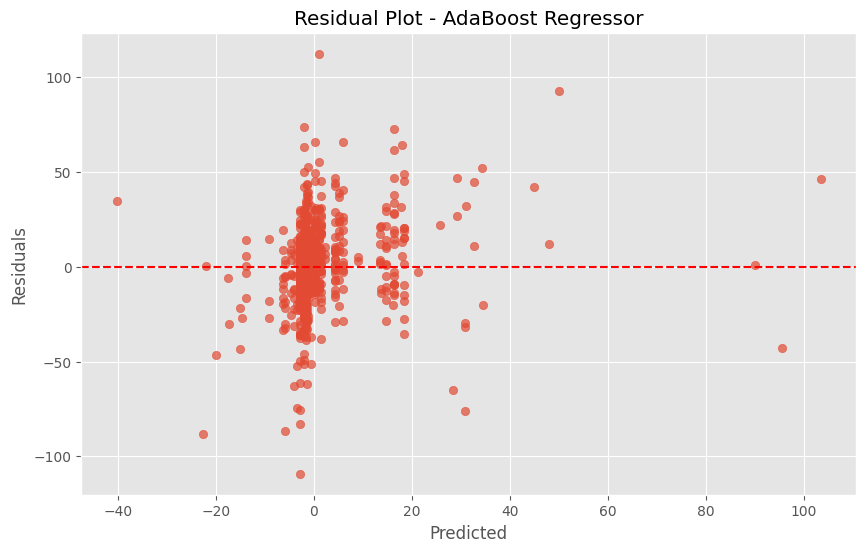


Melatih model: Gradient Boosting Regressor...

Menerapkan Constant/Quasi-constant feature removal...
Tidak ada fitur konstan yang dihapus.

Menerapkan Mutual Information Feature Selection...

Jumlah fitur yang dipilih: 90
Fitur terpilih: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 

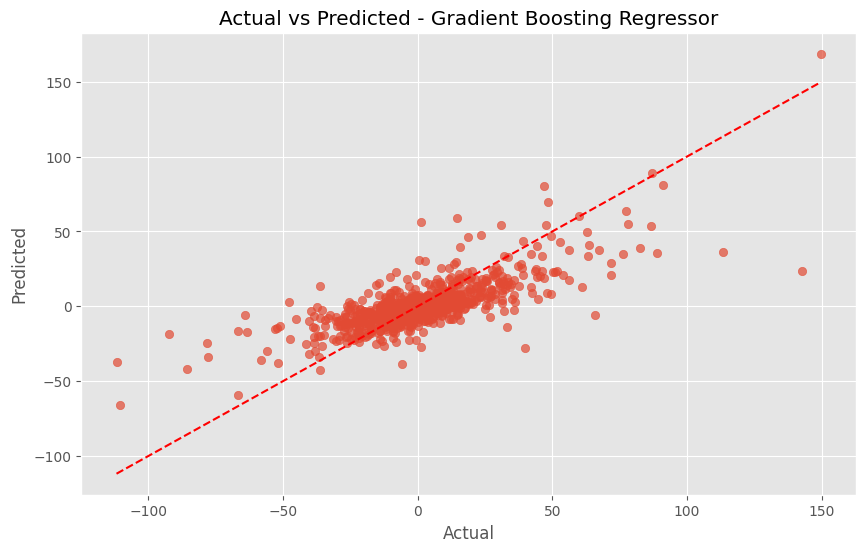

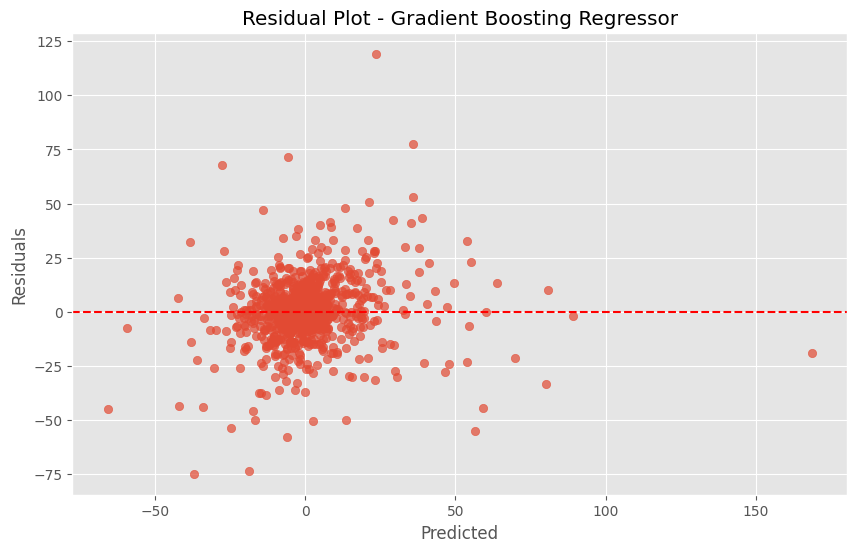


Melatih model: SVR...

Menerapkan Constant/Quasi-constant feature removal...
Tidak ada fitur konstan yang dihapus.

Menerapkan Mutual Information Feature Selection...

Jumlah fitur yang dipilih: 90
Fitur terpilih: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_5

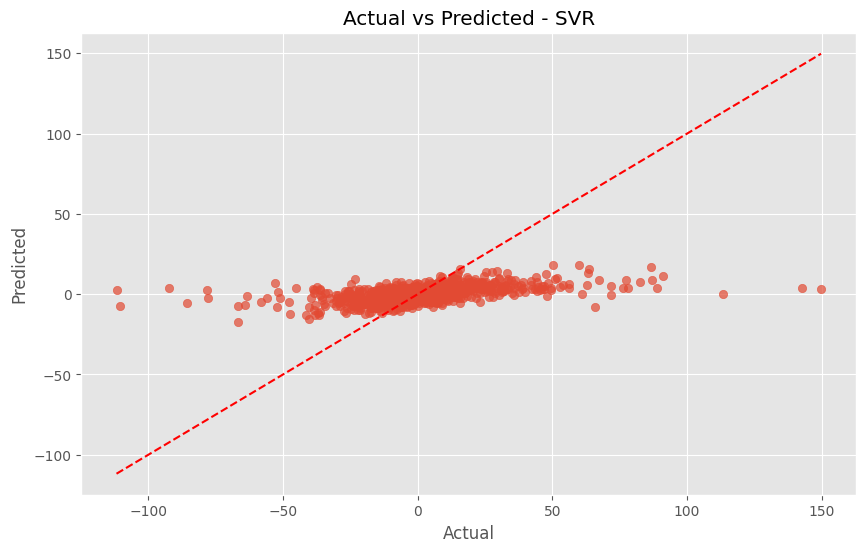

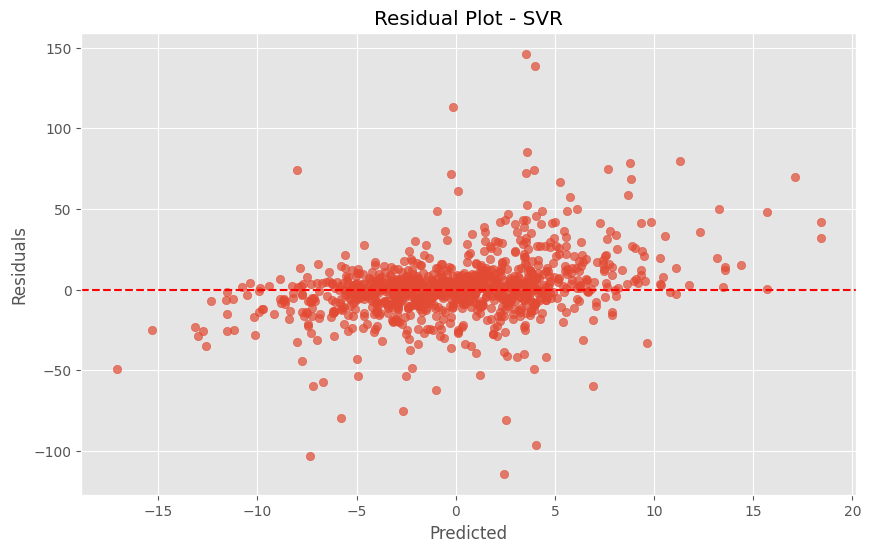

In [ ]:
print("\nMembuat dan mengevaluasi model...")

# Buat fungsi untuk evaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Fungsi untuk mengevaluasi model dan menampilkan metrik evaluasi
    """
    # Latih model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Hitung metrik evaluasi
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = math.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = math.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Cross-validation
    try:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = math.sqrt(-cv_scores.mean())
    except Exception as e:
        print(f"Error pada cross-validation: {str(e)}")
        cv_rmse = float('inf')

    print(f"\n=== Evaluasi Model: {model_name} ===")
    print(f"Train MSE: {mse_train:.2f}")
    print(f"Train RMSE: {rmse_train:.2f}")
    print(f"Train R²: {r2_train:.4f}")
    print(f"Test MSE: {mse_test:.2f}")
    print(f"Test RMSE: {rmse_test:.2f}")
    print(f"Test R²: {r2_test:.4f}")
    print(f"Cross-Validation RMSE: {cv_rmse:.2f}")

    # Visualisasi actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.show()

    # Visualisasi residual
    residuals = y_test - y_pred_test
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred_test, residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {model_name}')
    plt.show()

    return {
        'model_name': model_name,
        'mse_train': mse_train,
        'rmse_train': rmse_train,
        'r2_train': r2_train,
        'mse_test': mse_test,
        'rmse_test': rmse_test,
        'r2_test': r2_test,
        'cv_rmse': cv_rmse,
        'model': model
    }

# Definisi model-model yang akan digunakan
models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selector', FeatureSelector()),
        ('regressor', LinearRegression())
    ]),

    'Polynomial Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selector', FeatureSelector()),
        ('poly', PolynomialFeatures(degree=2)),
        ('regressor', LinearRegression())
    ]),

    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selector', FeatureSelector()),
        ('regressor', DecisionTreeRegressor(random_state=42))
    ]),

    'K-Neighbors': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selector', FeatureSelector()),
        ('regressor', KNeighborsRegressor(n_neighbors=5))
    ]),

    'Bagging Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selector', FeatureSelector()),
        ('regressor', BaggingRegressor(n_estimators=10, random_state=42))
    ]),

    'AdaBoost Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selector', FeatureSelector()),
        ('regressor', AdaBoostRegressor(n_estimators=50, random_state=42))
    ]),

    'Gradient Boosting Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selector', FeatureSelector()),
        ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ]),

    'SVR': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selector', FeatureSelector()),
        ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))
    ])
}

# Evaluasi semua model dan simpan hasilnya
results = []
for model_name, model in models.items():
    try:
        print(f"\nMelatih model: {model_name}...")
        result = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
        results.append(result)
    except Exception as e:
        print(f"Error pada model {model_name}: {str(e)}")

#5. Perbandingan Model


=== Perbandingan Model ===
                    model_name    rmse_train   rmse_test  r2_train    r2_test  \
6  Gradient Boosting Regressor  9.953534e+00   14.729015  0.797276   0.569610   
4            Bagging Regressor  7.036705e+00   17.337830  0.898681   0.403646   
0            Linear Regression  1.644817e+01   18.237219  0.446413   0.340170   
5           AdaBoost Regressor  1.672695e+01   19.302697  0.427489   0.260819   
3                  K-Neighbors  1.476328e+01   19.452634  0.554019   0.249291   
7                          SVR  1.969021e+01   20.394895  0.206675   0.174802   
2                Decision Tree  0.000000e+00   23.381261  1.000000  -0.084553   
1        Polynomial Regression  1.254681e-12  152.233166  1.000000 -44.976254   

      cv_rmse  
6   13.767121  
4   16.654562  
0   17.432470  
5   18.804485  
3   18.584985  
7   20.272913  
2   22.928370  
1  179.762758  


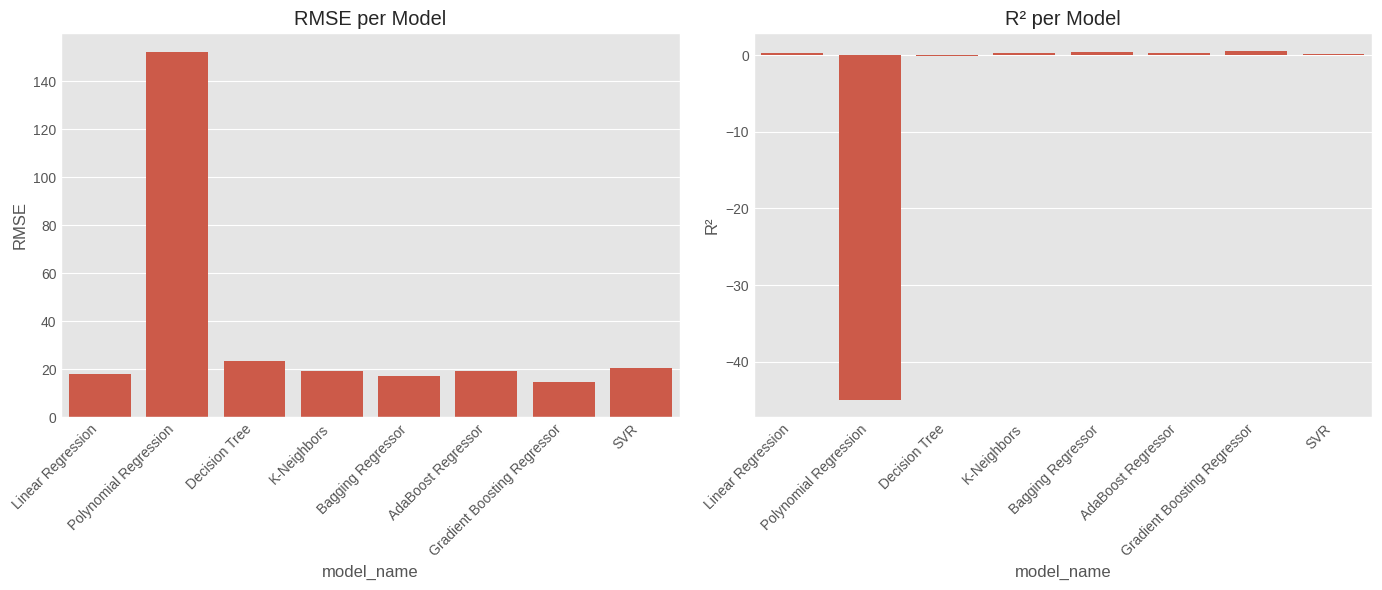

In [ ]:
# Buat dataframe untuk membandingkan hasil
comparison_df = pd.DataFrame(results)
comparison_cols = ['model_name', 'rmse_train', 'rmse_test', 'r2_train', 'r2_test', 'cv_rmse']
comparison_df = comparison_df[comparison_cols]

print("\n=== Perbandingan Model ===")
print(comparison_df.sort_values('rmse_test'))

# Visualisasi perbandingan model
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='model_name', y='rmse_test', data=comparison_df)
plt.title('RMSE per Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
sns.barplot(x='model_name', y='r2_test', data=comparison_df)
plt.title('R² per Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

#6. Model Terbaik

In [ ]:
# Temukan model terbaik berdasarkan RMSE test
best_model_idx = comparison_df['rmse_test'].idxmin()
best_model_info = comparison_df.loc[best_model_idx]
best_model = results[best_model_idx]['model']

print("\n=== Model Terbaik ===")
print(f"Model: {best_model_info['model_name']}")
print(f"Test RMSE: {best_model_info['rmse_test']:.2f}")
print(f"Test R²: {best_model_info['r2_test']:.4f}")
print(f"CV RMSE: {best_model_info['cv_rmse']:.2f}")


=== Model Terbaik ===
Model: Gradient Boosting Regressor
Test RMSE: 14.73
Test R²: 0.5696
CV RMSE: 13.77


### **1. Metrik Evaluasi**

#### **a. Mean Squared Error (MSE)**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
- **Interpretasi**: Error kuadrat rata-rata. Sensitif terhadap outlier.

#### **b. Root Mean Squared Error (RMSE)**
$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$
- **Interpretasi**: Menggunakan satuan yang sama dengan target.

#### **c. R-squared (\(R^2\))**
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
- **Interpretasi**: Proporsi variasi data yang dijelaskan model.

---

### **2. Model Regresi (Formulasi Matematis)**

#### **a. Linear Regression**
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon
$$
- **Optimisasi**: Minimalkan $\text{MSE}$ via _Ordinary Least Squares (OLS)_.

#### **b. Polynomial Regression**
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_d x^d + \epsilon
$$
- **Derajat \(d\)**: Menentukan kompleksitas non-linear.

#### **c. Decision Tree Regressor**
- **Split Kriteria** (minimalkan MSE):
$$
\text{MSE}_{\text{split}} = \sum_{\text{kiri}} (y_i - \bar{y}_{\text{kiri}})^2 + \sum_{\text{kanan}} (y_i - \bar{y}_{\text{kanan}})^2
$$

#### **d. K-Neighbors Regressor**
$$
\hat{y}(x) = \frac{1}{k} \sum_{i \in \mathcal{N}_k(x)} y_i
$$
- $\mathcal{N}_k(x)$: $k$ tetangga terdekat dari $x$.

#### **e. Gradient Boosting Regressor**
- **Model Aditif**:
$$
F_m(x) = F_{m-1}(x) + \gamma h_m(x)
$$
- $h_m(x)$: _Weak learner_ yang mengoreksi residual $y - F_{m-1}(x)$.

#### **f. Support Vector Regressor (SVR)**
- **Optimisasi**:
$$
\begin{align*}
\min_{w,b,\xi} & \quad \frac{1}{2} \| \mathbf{w} \|^2 + C \sum_{i=1}^n (\xi_i + \xi_i^*) \\
\text{s.t.} & \quad y_i - \mathbf{w}^T \phi(\mathbf{x}_i) - b \leq \epsilon + \xi_i \\
& \quad \mathbf{w}^T \phi(\mathbf{x}_i) + b - y_i \leq \epsilon + \xi_i^* \\
& \quad \xi_i, \xi_i^* \geq 0
\end{align*}
$$
- **Kernel**: $\phi(\mathbf{x}_i)$ mentransformasi data ke ruang dimensi tinggi.

---

### **3. Perbandingan Model**
- **Linear/Poly Regression**:  
  $\rightarrow$ Efisien untuk hubungan linear/sederhana.  
  $\rightarrow$ Gagal menangani interaksi kompleks.

- **Decision Tree/K-NN**:  
  $\rightarrow$ Baik untuk non-linearitas, tetapi:  
  $\rightarrow$ Tree: Rentan overfitting.  
  $\rightarrow$ K-NN: Sensitif terhadap dimensi tinggi.

- **Gradient Boosting**:  
  $\rightarrow$ Presisi tinggi dengan iterasi bertahap.  
  $\rightarrow$ Risiko overfitting jika terlalu kompleks.

- **SVR**:  
  $\rightarrow$ Robust terhadap outlier (karena $\epsilon$-insensitive loss).  
  $\rightarrow$ Komputasi mahal untuk dataset besar.

**Model Terbaik**: Gradient Boosting atau Random Forest umumnya dominan di dataset berukuran sedang dengan pola non-linear.